## 7.9　モデル定義


In [1]:
# !pip install japanize_matplotlib | tail -n 1
# !pip install torchviz | tail -n 1
# !pip install torchinfo | tail -n 1

In [2]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import japanize_matplotlib
import torch.optim as optim
import matplotlib.pyplot as plt
from torchviz import make_dot
from torchinfo import summary
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['axes.grid'] = True
np.set_printoptions(suppress=True, precision=4)

In [5]:
iris = load_iris()
x_org, y_org = iris.data, iris.target
print('元データ', x_org.shape, y_org.shape)

元データ (150, 4) (150,)


In [6]:
x_select = x_org[:, [0, 2]]
print('元データ', x_select.shape, y_org.shape)

元データ (150, 2) (150,)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_select, y_org, train_size=75, test_size=75, random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(75, 2) (75, 2) (75,) (75,)


In [8]:
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
x_t2 = x_train[y_train == 2]

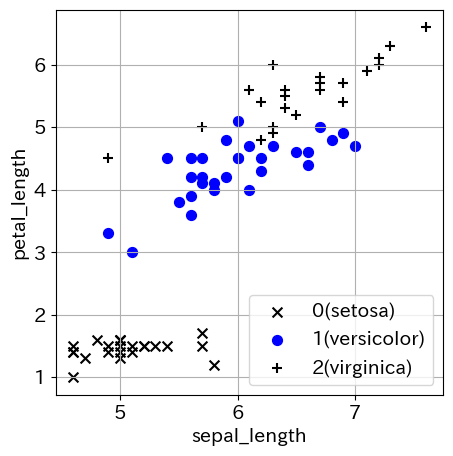

In [9]:
plt.scatter(x_t0[:, 0], x_t0[:, 1], marker='x', c='k', s=50, label='0(setosa)')
plt.scatter(x_t1[:, 0], x_t1[:, 1], marker='o', c='b', s=50, label='1(versicolor)')
plt.scatter(x_t2[:, 0], x_t2[:, 1], marker='+', c='k', s=50, label='2(virginica)')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()

In [10]:
n_input = x_train.shape[1]
n_output = len(list(set(y_train)))
print(f'n_input: {n_input} n_output: {n_output}')

n_input: 2 n_output: 3


In [11]:
class Net(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()
    self.l1 = nn.Linear(n_input, n_output)

    self.l1.weight.data.fill_(1.0)
    self.l1.bias.data.fill_(1.0)

  def forward(self, x):
    x1 = self.l1(x)
    return x1

net = Net(n_input, n_output)

In [12]:
for parameter in net.named_parameters():
  print(parameter)

('l1.weight', Parameter containing:
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True))
('l1.bias', Parameter containing:
tensor([1., 1., 1.], requires_grad=True))


In [13]:
criterion = nn.CrossEntropyLoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)